# Abstract:


Subjects receiving the same vaccine often show different levels of immune responses and some may even present adverse side effects to the vaccine. Systems vaccinology can combine data and machine learning techniques to obtain highly predictive signatures of vaccine immunogenicity and reactogenicity. Currently, several machine learning methods are already available to researchers with no background in bioinformatics.


## Problem Statement:
### Predict how likely it is that the people will take an H1N1 flu vaccine using Logistic Regression.



## Scope:
#### ●	Exploratory data analysis
#### ●	Data Pre-processing
#### ●	Training logistic regression model with MLE for prediction
#### ●	Tuning the model to improve the performance




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
import warnings 
warnings.filterwarnings( "ignore")

In [2]:
df=pd.read_csv("ML LOGR vaccine project.csv")

In [3]:
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [4]:
df.shape

(26707, 34)

## EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [6]:
# As these two columns dont make any importance to the data set so we are droping the columns

In [7]:
df.drop(['unique_id','has_health_insur'],axis=1,inplace=True)

In [8]:
df.isnull().sum()

h1n1_worry                     92
h1n1_awareness                116
antiviral_medication           71
contact_avoidance             208
bought_face_mask               19
wash_hands_frequently          42
avoid_large_gatherings         87
reduced_outside_home_cont      82
avoid_touch_face              128
dr_recc_h1n1_vacc            2160
dr_recc_seasonal_vacc        2160
chronic_medic_condition       971
cont_child_undr_6_mnths       820
is_health_worker              804
is_h1n1_vacc_effective        391
is_h1n1_risky                 388
sick_from_h1n1_vacc           395
is_seas_vacc_effective        462
is_seas_risky                 514
sick_from_seas_vacc           537
age_bracket                     0
qualification                1407
race                            0
sex                             0
income_level                 4423
marital_status               1408
housing_status               2042
employment                   1463
census_msa                      0
no_of_adults  

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
h1n1_worry,26615.0,1.618486,0.910311,0.0,1.0,2.0,2.0,3.0
h1n1_awareness,26591.0,1.262532,0.618149,0.0,1.0,1.0,2.0,2.0
antiviral_medication,26636.0,0.048844,0.215545,0.0,0.0,0.0,0.0,1.0
contact_avoidance,26499.0,0.725612,0.446214,0.0,0.0,1.0,1.0,1.0
bought_face_mask,26688.0,0.068982,0.253429,0.0,0.0,0.0,0.0,1.0
wash_hands_frequently,26665.0,0.825614,0.379448,0.0,1.0,1.0,1.0,1.0
avoid_large_gatherings,26620.0,0.358640,0.479610,0.0,0.0,0.0,1.0,1.0
reduced_outside_home_cont,26625.0,0.337315,0.472802,0.0,0.0,0.0,1.0,1.0
avoid_touch_face,26579.0,0.677264,0.467531,0.0,0.0,1.0,1.0,1.0
dr_recc_h1n1_vacc,24547.0,0.220312,0.414466,0.0,0.0,0.0,0.0,1.0


In [10]:
str_cols = df.select_dtypes(include = 'object').columns
df[str_cols].head()

,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City"
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City"
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City"
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City"


In [11]:
# FILLLING All the NULL values of numeric
for col in df.columns:
    if df[col].isnull().sum() and df[col].dtypes != 'object':
        df[col].loc[(df[col].isnull())] = df[col].median()


In [12]:
# FILLING All the NULL values of object
for col in df.columns:
    if df[col].isnull().sum() and df[col].dtypes == 'object':
        df[col].loc[(df[col].isnull())] = df[col].mode().max()

In [13]:
df.isnull().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vaccine                 0
dtype: i

In [14]:
# COUNTING NUM OF PEOPLE TAKEN THE   'H1N1'  AND   'SESONAL VACCINE'

<AxesSubplot:xlabel='dr_recc_h1n1_vacc', ylabel='count'>

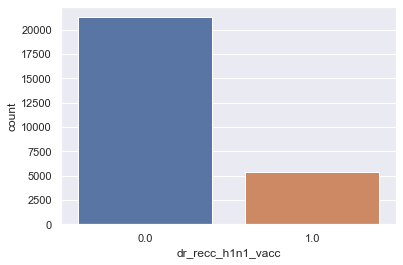

In [15]:
sns.set(style="darkgrid")
sns.countplot('dr_recc_h1n1_vacc',data=df)


<AxesSubplot:xlabel='dr_recc_seasonal_vacc', ylabel='count'>

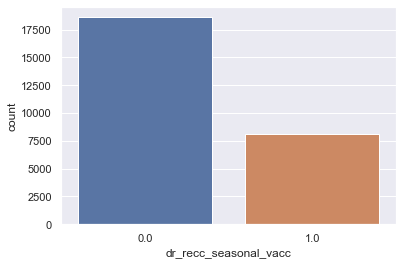

In [16]:
sns.set(style="darkgrid")
sns.countplot('dr_recc_seasonal_vacc',data=df)

In [17]:
# There is no outliers as the datas are basically in categorical form

In [18]:
# Observing peoples personal information and checking the people who have taken the h1n1 vaccine

In [19]:
df[str_cols].head(2)

,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City"


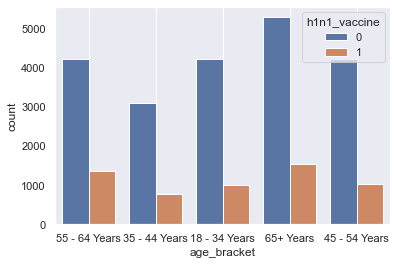

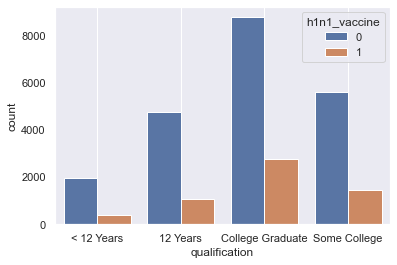

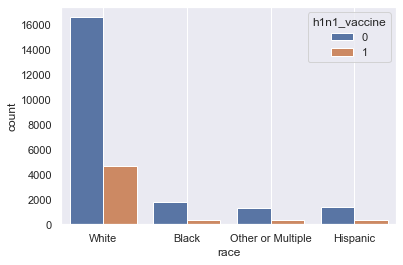

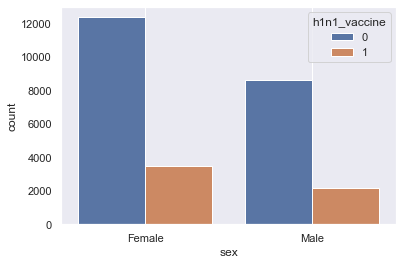

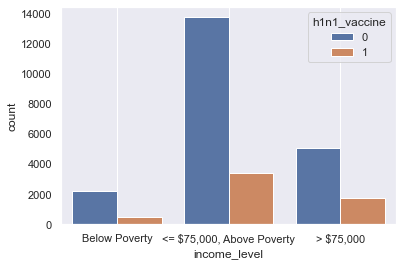

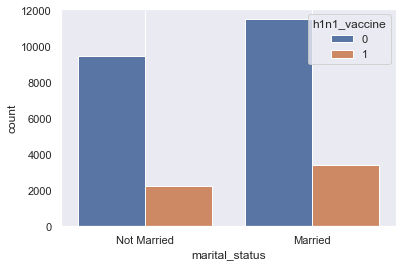

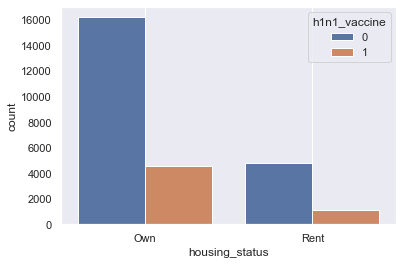

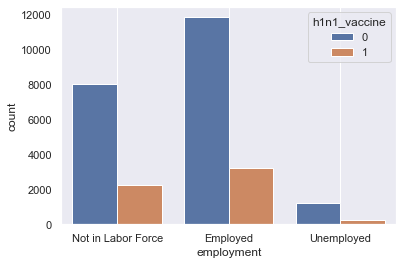

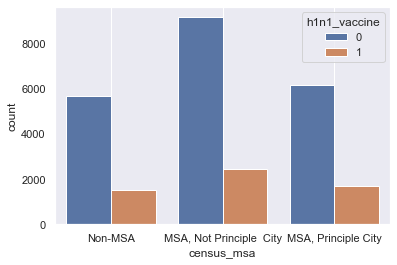

In [20]:
cols=['age_bracket','qualification','race','sex','income_level','marital_status','housing_status','employment','census_msa']
for i in cols:
    sns.set(style="darkgrid")
    sns.countplot(df[i],hue=df['h1n1_vaccine'])
    plt.grid()
    plt.show()

In [21]:
# seeing the age group and qualification of people taken the vaccine 

In [22]:
df.age_bracket.value_counts().index

Index(['65+ Years', '55 - 64 Years', '45 - 54 Years', '18 - 34 Years',
       '35 - 44 Years'],
      dtype='object')

In [23]:
#Since our age group starts at age 18, we can logically pair with a level of qualification. Can we find any patterns among age groups and qualification who were vaccinated?

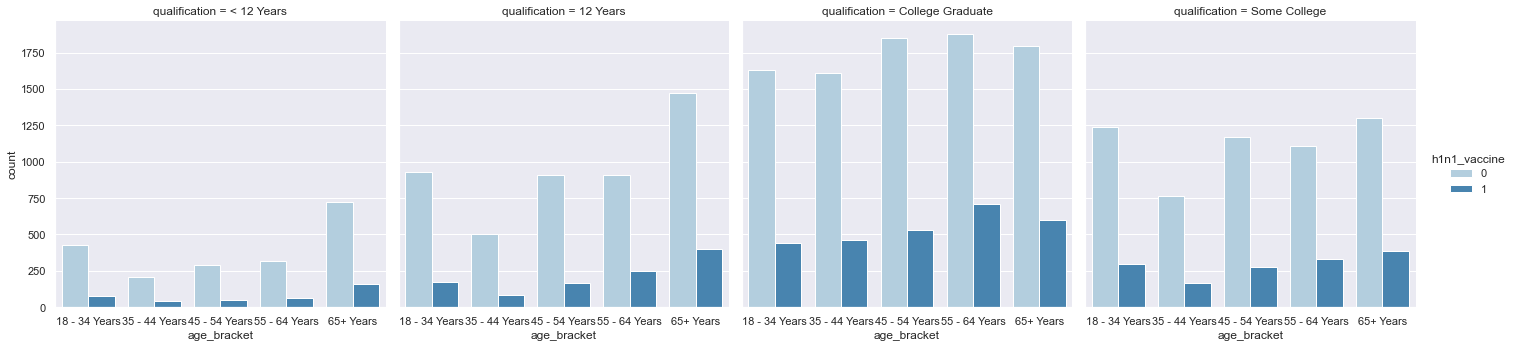

In [24]:
sns.catplot(x="age_bracket", col="qualification",hue='h1n1_vaccine',
                data=df,           #maybe try re-ordering columns another time.
                kind="count", palette='Blues', order=['18 - 34 Years', '35 - 44 Years', '45 - 54 Years', '55 - 64 Years', '65+ Years']
                )

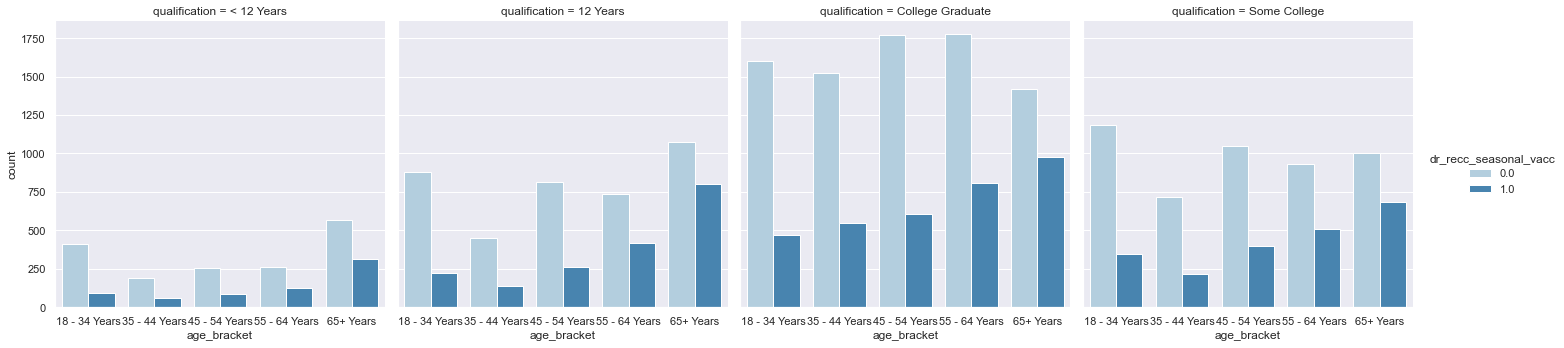

In [25]:
sns.catplot(x="age_bracket", col="qualification",hue='dr_recc_seasonal_vacc',
                data=df,kind="count", palette='Blues',order=['18 - 34 Years',
                            '35 - 44 Years', '45 - 54 Years', '55 - 64 Years', '65+ Years'])

In [26]:
#We can see generally there are more people vaccinated who are in a college graduate category. 
#Though there isn't necessarily a blatant pattern for age groups,
#but it seems like more than 60years people have taken the vaccine.

In [27]:
# Seeing the income level and housing status of people who have taken the vaccine

In [28]:
df['income_level'] =df['income_level'].map({'<= $75,000, Above Poverty':'<=75000 Above Poverty',
                                            '> $75,000':'>75000', 'Below Poverty':'Below Poverty'})

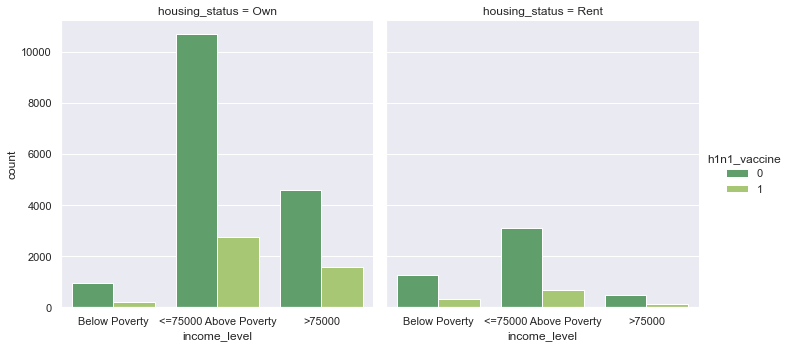

In [29]:
sns.catplot(x="income_level", col="housing_status",hue='h1n1_vaccine',
                data=df,kind="count", palette='summer')

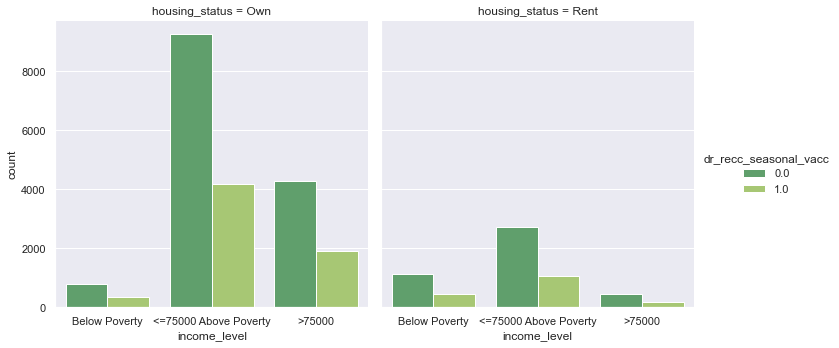

In [30]:
sns.catplot(x="income_level", col="housing_status",hue='dr_recc_seasonal_vacc',
                data=df,kind="count", palette='summer')

In [31]:
#The higher the income and those who own a residence, the more someone in general received the vaccine.

In [32]:
# Seeing sex and maritial status

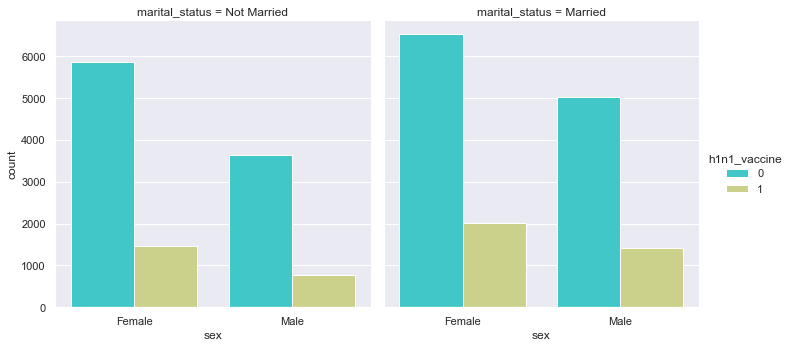

In [33]:
sns.catplot(x="sex", col="marital_status",hue='h1n1_vaccine',
                data=df,kind="count", palette='rainbow')

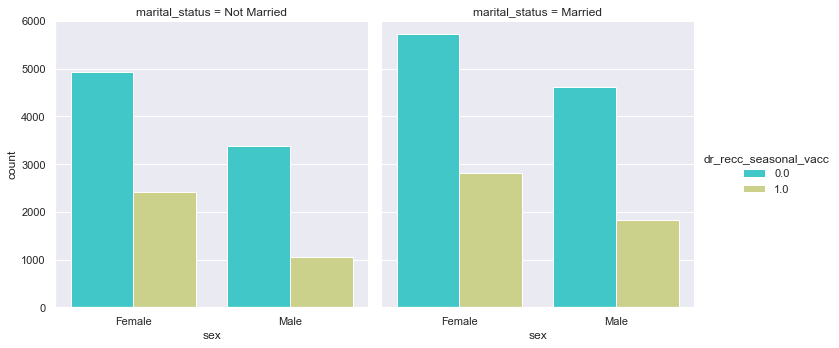

In [34]:
sns.catplot(x="sex", col="marital_status",hue='dr_recc_seasonal_vacc',
                data=df,kind="count", palette='rainbow')

In [35]:
# Seeing race & census_msa

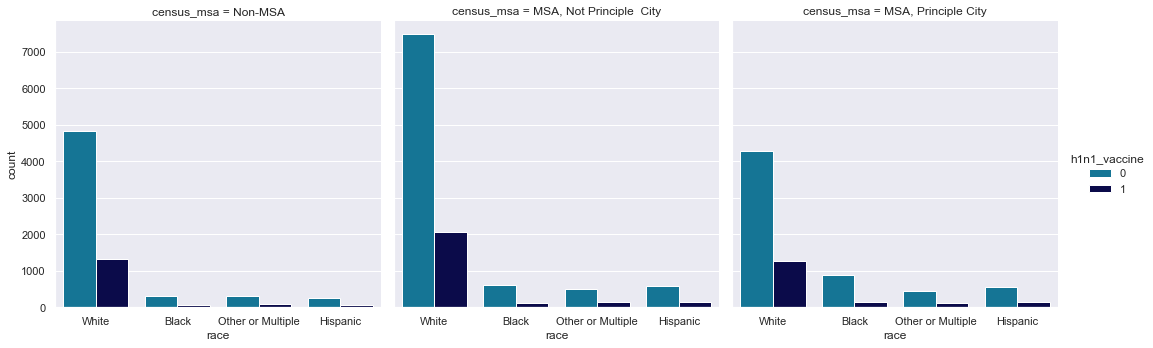

In [36]:
sns.catplot(x="race", col="census_msa",hue='h1n1_vaccine',
                data=df,kind="count", palette='ocean_r')

In [37]:
# White race people staying in MSA, Not Principle City likely to have more vaccines than others

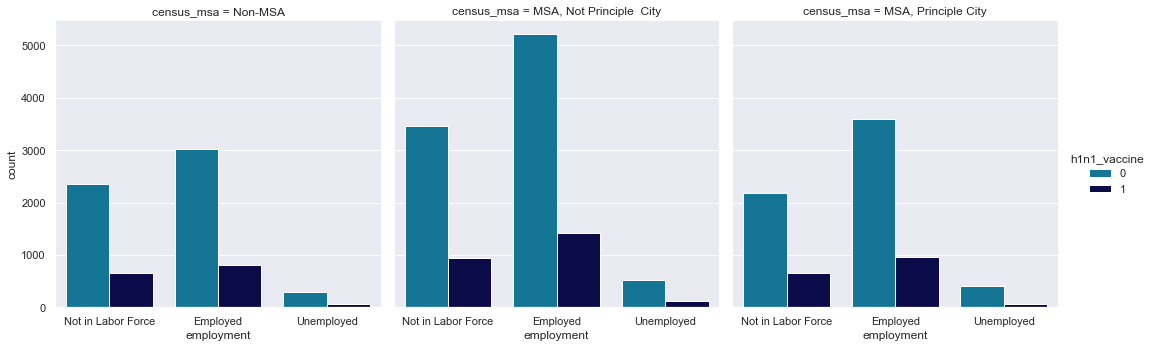

In [38]:
sns.catplot(x="employment", col="census_msa",hue='h1n1_vaccine',
                data=df,kind="count", palette='ocean_r')

Employed people staying in MSA, Not Principle City likely to have more vaccines than others

From the above relationship I observe that "White race married female people belonging to age group 55-65yrs having their income above poverty line and their own house staying in MAS, not priceple city" tends to have more vaccines than others. 

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 26707 non-null  float64
 1   h1n1_awareness             26707 non-null  float64
 2   antiviral_medication       26707 non-null  float64
 3   contact_avoidance          26707 non-null  float64
 4   bought_face_mask           26707 non-null  float64
 5   wash_hands_frequently      26707 non-null  float64
 6   avoid_large_gatherings     26707 non-null  float64
 7   reduced_outside_home_cont  26707 non-null  float64
 8   avoid_touch_face           26707 non-null  float64
 9   dr_recc_h1n1_vacc          26707 non-null  float64
 10  dr_recc_seasonal_vacc      26707 non-null  float64
 11  chronic_medic_condition    26707 non-null  float64
 12  cont_child_undr_6_mnths    26707 non-null  float64
 13  is_health_worker           26707 non-null  flo

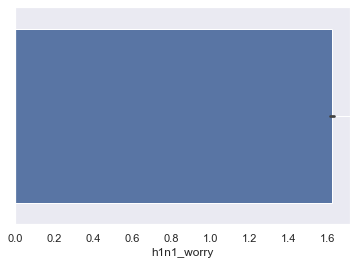

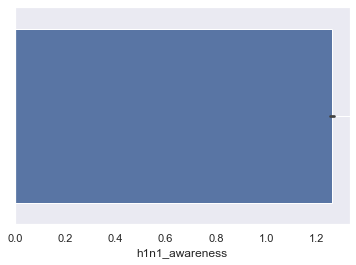

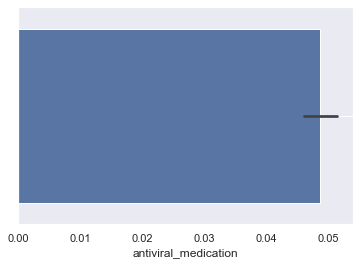

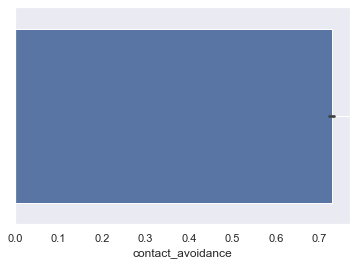

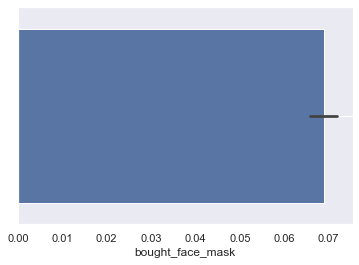

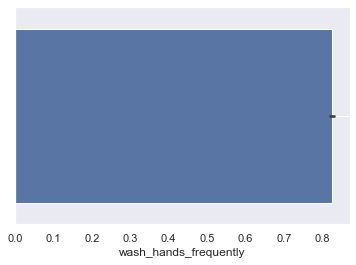

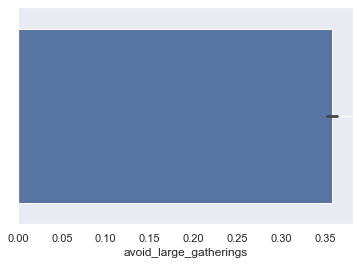

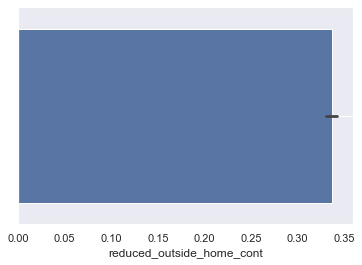

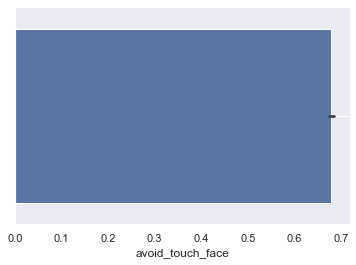

In [40]:
cols=['h1n1_worry','h1n1_awareness','antiviral_medication','contact_avoidance','bought_face_mask','wash_hands_frequently','avoid_large_gatherings','reduced_outside_home_cont','avoid_touch_face']
for i in cols:
    sns.set(style="darkgrid")
    sns.barplot(df[i],hue=df['h1n1_vaccine'])
    plt.grid()
    plt.show()

In [41]:
def univariateAnalysis_category(cat_column):
    print('Details of ' + cat_column)
    print("-----------------------------------------------")
    print(df_cat[cat_column].value_counts())
    plt.figure()
    df_cat[cat_column].value_counts().plot.bar(title="frequency data set")
    plt.show()
    print("          ")

In [42]:
df_cat = df.select_dtypes(include=['object'])
lsrcatcolumns=list(df_cat.columns.values)
lsrcatcolumns

['age_bracket',
 'qualification',
 'race',
 'sex',
 'income_level',
 'marital_status',
 'housing_status',
 'employment',
 'census_msa']

Details of age_bracket
-----------------------------------------------
65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: age_bracket, dtype: int64


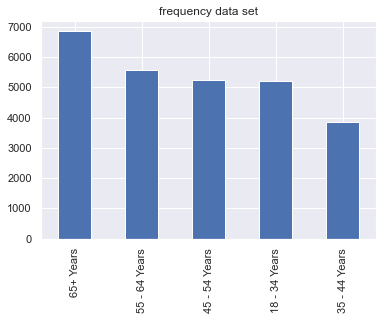

          
Details of qualification
-----------------------------------------------
College Graduate    11504
Some College         7043
12 Years             5797
< 12 Years           2363
Name: qualification, dtype: int64


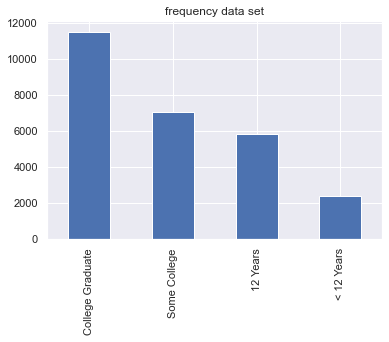

          
Details of race
-----------------------------------------------
White                21222
Black                 2118
Hispanic              1755
Other or Multiple     1612
Name: race, dtype: int64


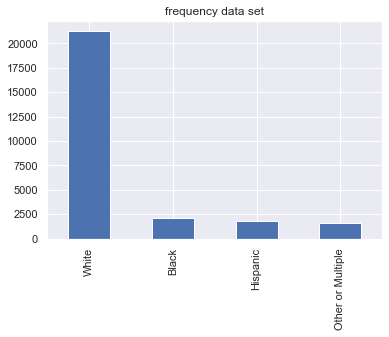

          
Details of sex
-----------------------------------------------
Female    15858
Male      10849
Name: sex, dtype: int64


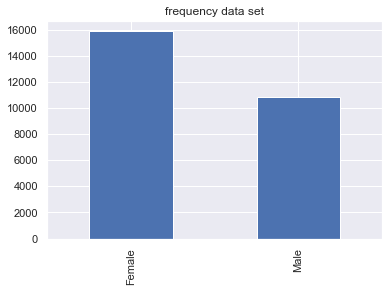

          
Details of income_level
-----------------------------------------------
<=75000 Above Poverty    17200
>75000                    6810
Below Poverty             2697
Name: income_level, dtype: int64


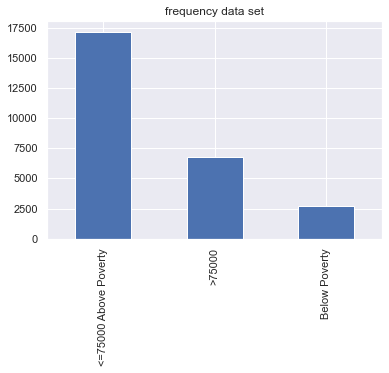

          
Details of marital_status
-----------------------------------------------
Married        14963
Not Married    11744
Name: marital_status, dtype: int64


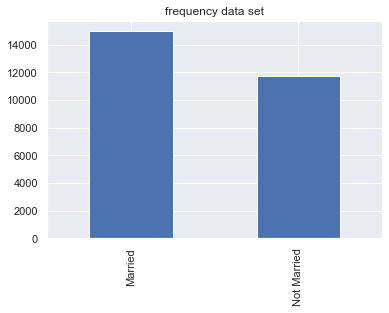

          
Details of housing_status
-----------------------------------------------
Own     20778
Rent     5929
Name: housing_status, dtype: int64


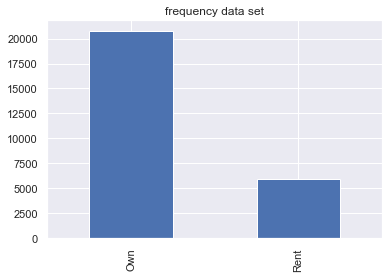

          
Details of employment
-----------------------------------------------
Employed              15023
Not in Labor Force    10231
Unemployed             1453
Name: employment, dtype: int64


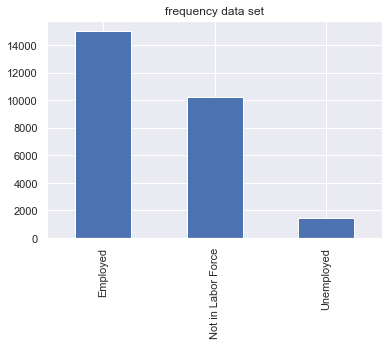

          
Details of census_msa
-----------------------------------------------
MSA, Not Principle  City    11645
MSA, Principle City          7864
Non-MSA                      7198
Name: census_msa, dtype: int64


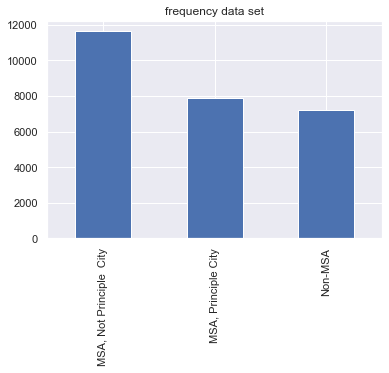

In [43]:
for x in lsrcatcolumns:
    univariateAnalysis_category(x)

Plotting Correlation Maps 

In [44]:
correlation = df.corr()

<AxesSubplot:>

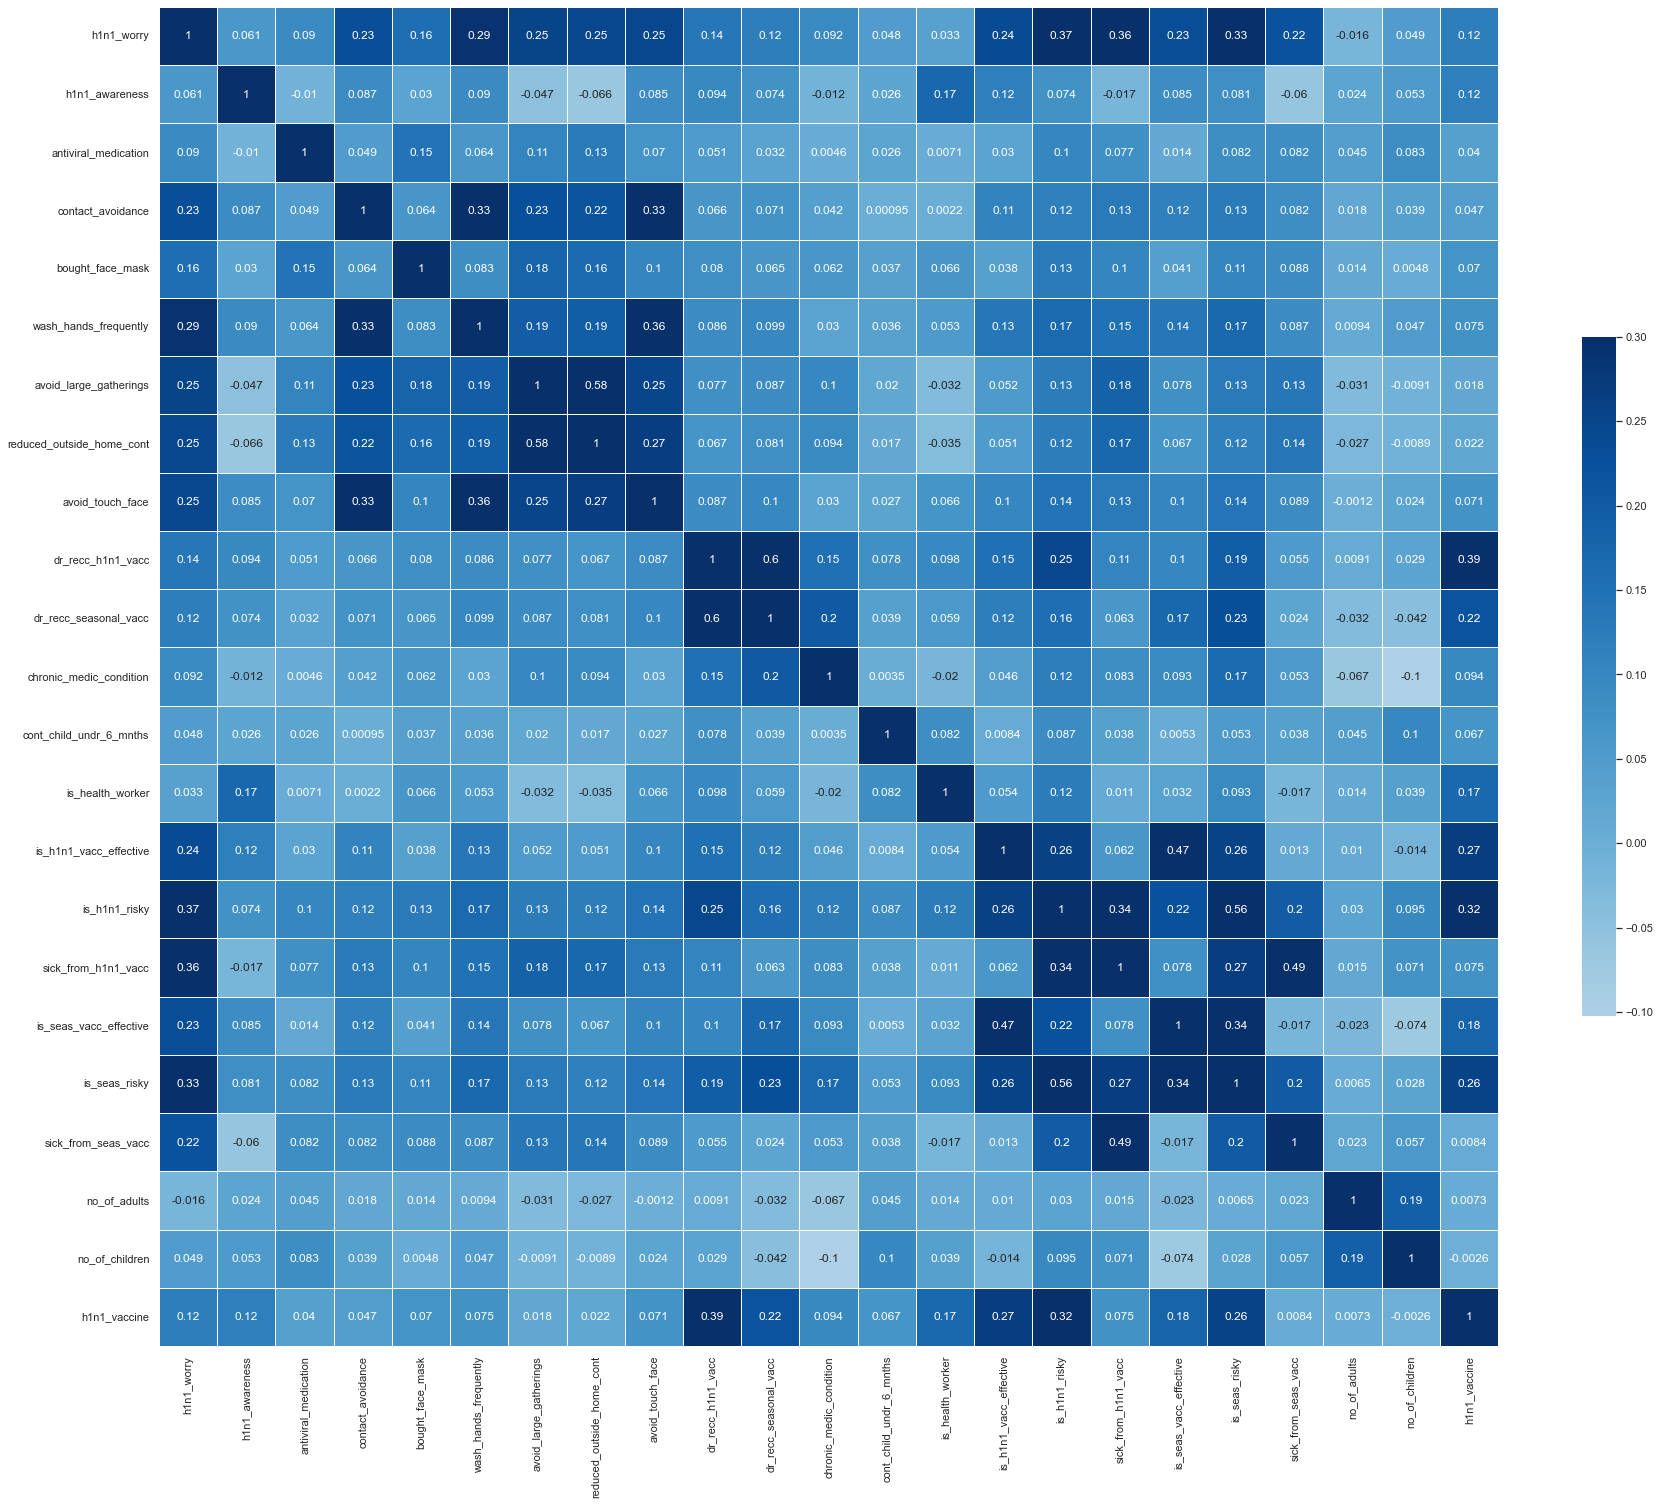

In [107]:
plt.figure(figsize=(30,25))
sns.heatmap(correlation,  vmax=.3, center=0,
            square=True, linewidths=1, cbar_kws={"shrink": .5},annot=True, cmap='Blues')

High Positive correlations between the 'behavioral_features' is noted, some of them may be redundant.

High Positive Correlations between opinion of h1n1 risk, doctor recommendation of vaccines Vs whether the person really took the vaccine. Seems fairly obvious

Overall the data features seems to be positively correlating with the act of taking the vaccination, except with some rare differences

Can mainly notice that there are many redundant features/sparsely correlated features which should be taken care of.

In [46]:
df['h1n1_vaccine'].value_counts(normalize=True)

0    0.787546
1    0.212454
Name: h1n1_vaccine, dtype: float64

In [47]:
df[str_cols].head()

,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City"
2,18 - 34 Years,College Graduate,White,Male,<=75000 Above Poverty,Not Married,Own,Employed,"MSA, Not Principle City"
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City"
4,45 - 54 Years,Some College,White,Female,<=75000 Above Poverty,Married,Own,Employed,"MSA, Not Principle City"


In [48]:
df['age_bracket'].value_counts()

65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: age_bracket, dtype: int64

In [49]:
df['qualification'].value_counts()

College Graduate    11504
Some College         7043
12 Years             5797
< 12 Years           2363
Name: qualification, dtype: int64

In [50]:
df['income_level'].value_counts()

<=75000 Above Poverty    17200
>75000                    6810
Below Poverty             2697
Name: income_level, dtype: int64

In [51]:
## We are coding up the 'education' variable in an ordinal manner

In [52]:
df['age_bracket']=np.where(df['age_bracket'] =='18 - 34 Years', '1', df['age_bracket'])
df['age_bracket']=np.where(df['age_bracket'] =='35 - 44 Years', '2', df['age_bracket'])
df['age_bracket']=np.where(df['age_bracket'] =='45 - 54 Years', '3', df['age_bracket'])
df['age_bracket']=np.where(df['age_bracket'] =='55 - 64 Years', '4', df['age_bracket'])
df['age_bracket']=np.where(df['age_bracket'] =='65+ Years', '5', df['age_bracket'])

df['qualification']=np.where(df['qualification'] =='< 12 Years', '1', df['qualification'])
df['qualification']=np.where(df['qualification'] =='12 Years', '2', df['qualification'])
df['qualification']=np.where(df['qualification'] =='Some College', '3', df['qualification'])
df['qualification']=np.where(df['qualification'] =='College Graduate', '4', df['qualification'])

df['income_level']=np.where(df['income_level'] =='Below Poverty', '1', df['income_level'])
df['income_level']=np.where(df['income_level'] =='<= $75,000, Above Poverty', '2', df['income_level'])
df['income_level']=np.where(df['income_level'] =='> $75,000', '3', df['income_level'])

In [53]:
df[str_cols].head()

,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa
0,4,1,White,Female,1,Not Married,Own,Not in Labor Force,Non-MSA
1,2,2,White,Male,1,Not Married,Rent,Employed,"MSA, Not Principle City"
2,1,4,White,Male,<=75000 Above Poverty,Not Married,Own,Employed,"MSA, Not Principle City"
3,5,2,White,Female,1,Not Married,Rent,Not in Labor Force,"MSA, Principle City"
4,3,3,White,Female,<=75000 Above Poverty,Married,Own,Employed,"MSA, Not Principle City"


### LABEL ENCODING

In [54]:
df['sex'].value_counts()

Female    15858
Male      10849
Name: sex, dtype: int64

In [55]:
df['marital_status'].value_counts()

Married        14963
Not Married    11744
Name: marital_status, dtype: int64

In [56]:
df['housing_status'].value_counts()

Own     20778
Rent     5929
Name: housing_status, dtype: int64

In [57]:
from sklearn.preprocessing import LabelEncoder

In [58]:
LE=LabelEncoder()

In [59]:
df['sex']=LE.fit_transform(df['sex'])
df['marital_status']=LE.fit_transform(df['marital_status'])
df['housing_status']=LE.fit_transform(df['housing_status'])

In [60]:
df[str_cols].head()

,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa
0,4,1,White,0,1,1,0,Not in Labor Force,Non-MSA
1,2,2,White,1,1,1,1,Employed,"MSA, Not Principle City"
2,1,4,White,1,<=75000 Above Poverty,1,0,Employed,"MSA, Not Principle City"
3,5,2,White,0,1,1,1,Not in Labor Force,"MSA, Principle City"
4,3,3,White,0,<=75000 Above Poverty,0,0,Employed,"MSA, Not Principle City"


### ONE HOT CODING

In [61]:
df_dummy=pd.get_dummies(df,columns=['race','employment','census_msa','income_level'],drop_first=True)
df_dummy.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,h1n1_vaccine,race_Hispanic,race_Other or Multiple,race_White,employment_Not in Labor Force,employment_Unemployed,"census_msa_MSA, Principle City",census_msa_Non-MSA,income_level_<=75000 Above Poverty,income_level_>75000
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,0,0,1,1,0,0,1,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0,0,0,1,0,0,0,0,0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0,0,0,1,1,0,1,0,0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [62]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   h1n1_worry                          26707 non-null  float64
 1   h1n1_awareness                      26707 non-null  float64
 2   antiviral_medication                26707 non-null  float64
 3   contact_avoidance                   26707 non-null  float64
 4   bought_face_mask                    26707 non-null  float64
 5   wash_hands_frequently               26707 non-null  float64
 6   avoid_large_gatherings              26707 non-null  float64
 7   reduced_outside_home_cont           26707 non-null  float64
 8   avoid_touch_face                    26707 non-null  float64
 9   dr_recc_h1n1_vacc                   26707 non-null  float64
 10  dr_recc_seasonal_vacc               26707 non-null  float64
 11  chronic_medic_condition             26707

In [63]:
df['age_bracket']=df['age_bracket'].astype(float)

In [64]:
df['qualification']=df['qualification'].astype(float)

In [109]:
df_dummy.T.iloc[:,:6]

,0,1,2,3,4,5
h1n1_worry,1.0,3.0,1.0,1.0,2.0,3.0
h1n1_awareness,0.0,2.0,1.0,1.0,1.0,1.0
antiviral_medication,0.0,0.0,0.0,0.0,0.0,0.0
contact_avoidance,0.0,1.0,1.0,1.0,1.0,1.0
bought_face_mask,0.0,0.0,0.0,0.0,0.0,0.0
wash_hands_frequently,0.0,1.0,0.0,1.0,1.0,1.0
avoid_large_gatherings,0.0,0.0,0.0,1.0,1.0,0.0
reduced_outside_home_cont,1.0,1.0,0.0,0.0,0.0,0.0
avoid_touch_face,1.0,1.0,0.0,0.0,1.0,1.0
dr_recc_h1n1_vacc,0.0,0.0,0.0,0.0,0.0,0.0


### Train Test Split

In [65]:
# Copy all the predictor variables into X dataframe
x=df_dummy.drop('h1n1_vaccine',axis=1)

# Copy target into the y dataframe. 
y=df_dummy['h1n1_vaccine']

In [66]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: h1n1_vaccine, dtype: int64

In [67]:
x.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,no_of_children,race_Hispanic,race_Other or Multiple,race_White,employment_Not in Labor Force,employment_Unemployed,"census_msa_MSA, Principle City",census_msa_Non-MSA,income_level_<=75000 Above Poverty,income_level_>75000
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0,0,1,1,0,0,1,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0,0,1,0,0,0,0,0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,1,0,0,0,0,1,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0,0,1,1,0,1,0,0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0,0,1,0,0,0,0,1,0


In [68]:
# Split X and y into training and test set in 70:30 ratio


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1,stratify=y)

In [69]:
y_train.value_counts(normalize=True)

0    0.787525
1    0.212475
Name: h1n1_vaccine, dtype: float64

### Logistic Regression Model

In [70]:
model=LogisticRegression(verbose=True)
model.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(verbose=True)

#### Predicting on Training and Test dataset

In [71]:
ytrain_predict=model.predict(x_train)
ytest_predict=model.predict(x_test)

In [72]:
ytrain_predict

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [73]:
ytest_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Getting the Predicted Classes and Probs¶

In [74]:
ytrain_predict_prob=model.predict_proba(x_train)
ytest_predict_prob=model.predict_proba(x_test)

In [75]:
pd.DataFrame(ytrain_predict_prob).head()

,0,1
0,0.909052,0.090948
1,0.957205,0.042795
2,0.344398,0.655602
3,0.858009,0.141991
4,0.860899,0.139101


In [76]:
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.914410,0.085590
1,0.924987,0.075013
2,0.980172,0.019828
3,0.975746,0.024254
4,0.875472,0.124528


### Model Evaluation

In [77]:
# Accuracy - Training Data

model.score(x_train,y_train)

0.8350272814806889

In [78]:
# Accuracy - Test Data
model.score(x_test,y_test)

0.8393859977536503

### AUC and ROC for the training data

AUC_Train 0.8265314407755524


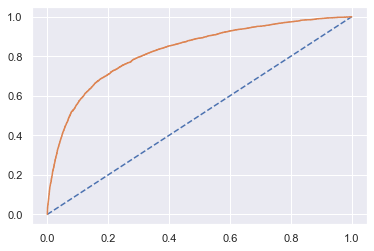

In [79]:
# predict probabilities
probs=model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs=probs[:,1]
# calculate AUC
auc=roc_auc_score(y_train,probs)
print('AUC_Train {}'.format(auc))
# calculate roc curve
train_FPR,train_TPR,threshold=roc_curve(y_train,probs)
plt.plot([0,1],[0,1],linestyle='--')
# plot the roc curve for the model
plt.plot(train_FPR,train_TPR);

### AUC and ROC for the test data

AUC_Test 0.8392772323555705


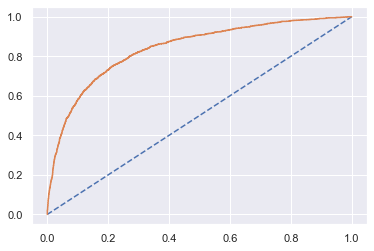

In [80]:
# predict probabilities
probs=model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs=probs[:,1]
# calculate AUC
auc=roc_auc_score(y_test,probs)
print('AUC_Test {}'.format(auc))
# calculate roc curve
test_FPR,test_TPR,threshold=roc_curve(y_test,probs)
plt.plot([0,1],[0,1],linestyle='--')
# plot the roc curve for the model
plt.plot(test_FPR,test_TPR);

### Confusion Matrix for the training data

In [81]:
confusion_matrix(y_train,ytrain_predict)

array([[13979,   743],
       [ 2341,  1631]], dtype=int64)

<AxesSubplot:>

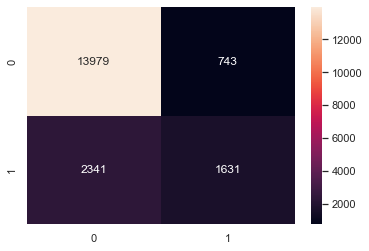

In [82]:
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot=True,fmt='g')

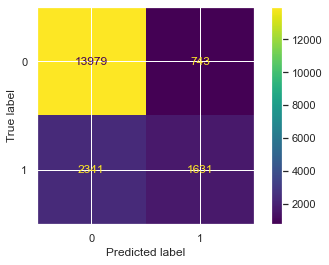

In [83]:
plot_confusion_matrix(model,x_train,y_train)

In [84]:
sensitivity=1631/(1631+2341)
sensitivity

0.4106243705941591

In [85]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     14722
           1       0.69      0.41      0.51      3972

    accuracy                           0.84     18694
   macro avg       0.77      0.68      0.71     18694
weighted avg       0.82      0.84      0.82     18694



### Confusion Matrix for test data

<AxesSubplot:>

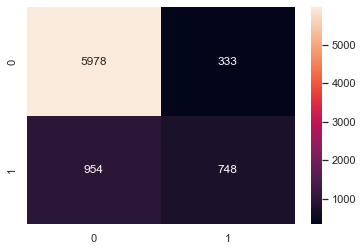

In [86]:
sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True,fmt='g')

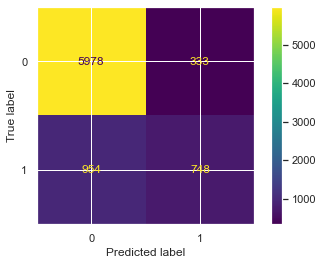

In [87]:
plot_confusion_matrix(model,x_test,y_test)

In [88]:
sensitivity=753/(753+949)
sensitivity

0.44242068155111636

In [89]:
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      6311
           1       0.69      0.44      0.54      1702

    accuracy                           0.84      8013
   macro avg       0.78      0.69      0.72      8013
weighted avg       0.83      0.84      0.83      8013



In [90]:
# Here sensitivity < 0.5 so,it's a class inbalance problem.

# Applying GridSearchCV for Logistic Regression

In [91]:
grid={'penalty':['l1','l2','elesticnet','None'],
      'solver':['lbfgs','liblinear'],
      'tol':[0.01,0.0001]}

In [92]:
model=LogisticRegression(max_iter=10000)
grid_search=GridSearchCV(estimator=model,param_grid=grid,cv=3,scoring='recall',n_jobs=-1)

In [93]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000), n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'elesticnet', 'None'],
                         'solver': ['lbfgs', 'liblinear'],
                         'tol': [0.01, 0.0001]},
             scoring='recall')

In [94]:
grid_search.best_params_

{'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001}

In [95]:
best_model=grid_search.best_estimator_

In [96]:
best_model.score(x_train,y_train)

0.8352947469776398

In [97]:
best_model.score(x_test,y_test)

0.8392612005491077

In [98]:
Y_train_predict=best_model.predict(x_train)
Y_test_predict=best_model.predict(x_test)

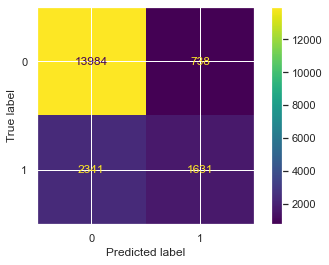

In [99]:
plot_confusion_matrix(best_model,x_train,y_train)

In [102]:
bal_model=LogisticRegression(penalty='l2',solver='lbfgs',max_iter=10000,tol=0.01,class_weight='balanced')

In [103]:
bal_model.fit(x_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=10000, tol=0.01)

In [104]:
y_train_predict=bal_model.predict(x_train)
y_test_predict=bal_model.predict(x_test)

              precision    recall  f1-score   support

           0       0.91      0.79      0.85     14722
           1       0.48      0.72      0.58      3972

    accuracy                           0.78     18694
   macro avg       0.70      0.76      0.71     18694
weighted avg       0.82      0.78      0.79     18694
 



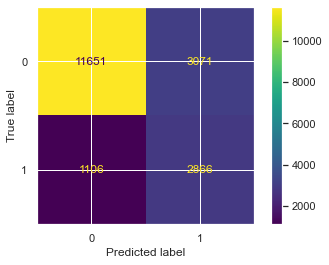

In [105]:
plot_confusion_matrix(bal_model,x_train,y_train)
print(classification_report(y_train,y_train_predict),'\n')

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      6311
           1       0.49      0.74      0.59      1702

    accuracy                           0.78      8013
   macro avg       0.70      0.77      0.72      8013
weighted avg       0.83      0.78      0.79      8013
 



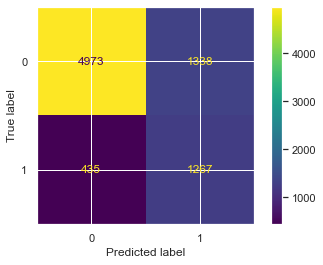

In [106]:
plot_confusion_matrix(bal_model,x_test,y_test)
print(classification_report(y_test,y_test_predict),'\n')